In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Credit Card Default II (balance).csv")

In [3]:
#Check for null values
df.isnull().sum()

income     0
age        0
loan       0
default    0
dtype: int64

In [4]:
#Check for negative number
df.lt(0).sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [5]:
#Replace negative age with na as it is an invalid data value
df["age"] = df.age.apply(lambda x: x if x > 0 else np.nan)

In [6]:
#Check that is is sucessfully replace with na
df.head(16)

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
5,24904.06414,57.471607,15.498598,0
6,48430.35961,26.809132,5722.581981,0
7,24500.14198,32.897548,2971.003310,1
8,40654.89254,55.496853,4755.825280,0
9,25075.87277,39.776378,1409.230371,0


In [7]:
#Check that is is sucessfully replace with na
df.isnull().sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
#Ensure that na values are dropped
df.isnull().sum()

income     0
age        0
loan       0
default    0
dtype: int64

In [10]:
#remove outlier
import numpy as np
from scipy import stats
z = stats.zscore(df.astype(np.float)) #zscore conversion need float
z = np.abs(z) #convert all to positive because the parity is not important
f = (z < 3).all(axis=1) #3 is your choice, axis =1 means by columns, f is a flag

df = df[f]

C:\Users\kebom\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [11]:
X = df.loc[:,["income", "age", "loan"]]
Y = df.loc[:,["default"]]

In [12]:
###########Logistic regression##########
#Check for collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

#income, age and loan is higly correlated to default rate

  feature        VIF
0  income  12.181603
1     age   5.139917
2    loan   6.209883


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A03ABF048>,
      dtype=object)

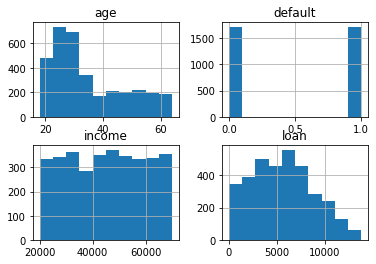

In [13]:
#Data visualisation
df.hist()

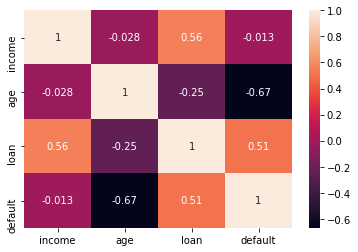

In [14]:
#Data visualisation
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [15]:
#normalization
from scipy import stats
import numpy as np
pd.set_option('display.max_rows', 10)
for i in X.columns:
    X[i]=stats.zscore(X[i].astype(np.float))
print(X)

        income       age      loan
0     1.457403  1.909165  0.792201
1    -0.743092  1.047710  0.306524
2     0.844638  2.232494  0.765243
3    -0.168066  0.860782  0.161272
4     1.512641 -1.286373  1.001231
...        ...       ...       ...
3423  1.093247 -1.021644  1.504295
3424  1.185622 -0.776711  0.785072
3425 -1.354369 -0.672598 -0.561212
3426  0.210089 -0.926167  0.295469
3427 -0.837331 -0.677398 -0.075549

[3425 rows x 3 columns]


C:\Users\kebom\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [16]:
#split, train, test and predict
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
print(X_train, X_test, Y_train, Y_test )

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

pred = model.predict(X_train)

        income       age      loan
2259 -0.740616 -0.600879  0.266769
2777  0.012758 -0.593580 -0.006699
2978 -1.322568 -0.536175 -0.668988
2006 -1.734696 -0.386418 -0.971608
1040  0.080071 -0.890755  0.145569
...        ...       ...       ...
2979 -0.273396 -0.488249  0.410080
2102 -1.119022 -0.347082 -0.600339
435   0.398296  0.798594 -0.735443
1779 -0.552599 -0.472939 -0.781586
3285 -1.336153 -0.996753 -0.625370

[2397 rows x 3 columns]         income       age      loan
60   -0.860078 -0.030488 -1.418728
590   1.584141 -0.584481 -1.243882
1465  1.567973 -0.106054  0.398267
354   1.039090  2.216811  0.503280
2275  0.747820 -0.187053  0.805797
...        ...       ...       ...
1701 -0.325185 -0.094945 -1.176381
2906 -1.548853 -0.234106 -0.693650
2444  1.360330 -0.371371  0.969739
1546 -1.370935  0.498794 -1.062041
2303 -1.003375 -0.410955 -0.383781

[1028 rows x 3 columns]       default
2259        1
2777        1
2978        1
2006        1
1040        1
...       ...
2979        

C:\Users\kebom\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Setting the seed to 10
import numpy as np
np.random.seed(10)

In [18]:
#Split train test, train, predict
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
print(X_train, X_test, Y_train, Y_test )

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

pred = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)

accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))

print(accuracy)

#The accuracy of testset is higher than trainset 

        income       age      loan
1279  1.002142 -1.126297 -0.441003
1699  1.577059  1.454177  1.547291
155   1.421123  0.967777  2.175567
1431  1.309987  0.102516 -1.243450
877   1.566560 -0.676328  1.036350
...        ...       ...       ...
3198  1.311536 -0.659965  1.341262
1347  1.695617  2.242814  2.341582
530   0.228751 -0.500174 -1.512691
3200  0.734904 -0.557506  0.711182
1292  0.620065  1.759290  0.490591

[2397 rows x 3 columns]         income       age      loan
1503  1.669087 -0.697691  0.218349
3238 -0.732574 -0.627499  0.246417
1435  0.894675  1.512821 -1.591885
2449 -0.824102 -0.987798  0.197336
1800  1.519310  1.595878  1.653242
...        ...       ...       ...
2770  1.284063 -0.579525  1.031382
3017  1.611599 -0.360861  1.663292
2984 -0.748563 -0.607494 -0.097307
2551  0.481007 -1.214620  1.016448
107  -0.598823 -1.212763 -1.709296

[1028 rows x 3 columns]       default
1279        0
1699        0
155         0
1431        0
877         1
...       ...
3198        

C:\Users\kebom\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


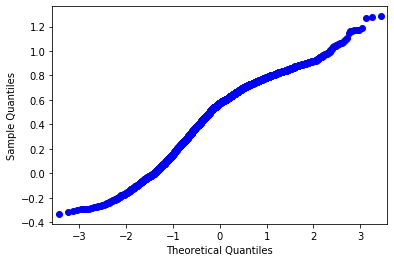

In [19]:
#QQplot
import statsmodels.api as sm
from matplotlib import pyplot as plt
mod_fit = sm.OLS(Y,X).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

In [20]:
#Annova
import statsmodels.api as sm
model=sm.Logit(Y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.189963
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.726    
Dependent Variable: default          AIC:              1307.2456
Date:               2022-02-24 11:37 BIC:              1325.6622
No. Observations:   3425             Log-Likelihood:   -650.62  
Df Model:           2                LL-Null:          -2374.0  
Df Residuals:       3422             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
income      -2.1915    0.1135  -19.3078  0.0000  -2.4140  -1.9691
age         -3.0841    0.1203  -25.6413  0.0000  -3.3198  -2.8483
loan    

In [21]:
import pickle

pickle.dump(model, open("LogisticRegressionDefault", 'wb'))

In [22]:
##########Decision Tree##########
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=9) #Through my own experiment trying the different max_depth, The most optimised max_depth is 9

model.fit(X_train, Y_train)
pred = model.predict(X_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, Y_train)
print(cm)
accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

pred = model.predict(X_test)
cm = confusion_matrix(pred, Y_test)
print(cm)
accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

[[1191    0]
 [   0 1206]]
1.0
[[515   3]
 [  5 505]]
0.9922178988326849


In [23]:
######################Random forest #########################
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))

print(accuracy)

pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))

print(accuracy)

C:\Users\kebom\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[1191    0]
 [   0 1206]]
1.0
[[515   5]
 [  0 508]]
0.995136186770428


In [24]:
import joblib 
joblib.dump(model,"RandomForestDefault")

['RandomForestDefault']

In [25]:
###################XGBoost####################
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train, Y_train)
pred = model.predict(X_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

C:\Users\kebom\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1191    0]
 [   0 1206]]
1.0
[[513   7]
 [  1 507]]
0.9922178988326849


In [26]:
import joblib 
joblib.dump(model,"XGBoostDefault")

['XGBoostDefault']

In [27]:
#########################Neural network#################
from keras.models import Sequential
from keras.layers import Dense, Dropout
model=Sequential()

In [28]:
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])

In [30]:
model.fit(X_train, Y_train, batch_size = 30, epochs=30, verbose=1)

Epoch 1/30
80/80 [==============================] - 1s 2ms/step - loss: 0.6257 - accuracy: 0.6558
Epoch 2/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7447
Epoch 3/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7835
Epoch 4/30
80/80 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7935
Epoch 5/30
80/80 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8035
Epoch 6/30
80/80 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7981
Epoch 7/30
80/80 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8185
Epoch 8/30
80/80 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8118
Epoch 9/30
80/80 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8223
Epoch 10/30
80/80 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.8340
Epoch 11/30
80/80 [

In [31]:
model.evaluate(X_train, Y_train)
model.evaluate(X_test, Y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9640


[0.1156098023056984, 0.9640077948570251]

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred=model.predict(X_train)
pred=np.where(pred>0.5,1,0)
cm=confusion_matrix(Y_train, pred)
print(cm)

accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

pred=model.predict(X_test)
pred=np.where(pred>0.5,1,0)
cm=confusion_matrix(Y_test, pred)
print(cm)

accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

[[1087  104]
 [  14 1192]]
0.9507717980809345
[[488  32]
 [  5 503]]
0.9640077821011673


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[ 0.2173889 , -0.17024133, -0.25627017,  0.3102909 , -0.38232884,
          0.12271597, -0.27036336, -0.18363479, -0.15503542, -0.22912636],
        [ 0.9133247 , -0.751535  , -0.57971925, -0.6759527 , -0.51664805,
          0.6097247 , -0.04869802,  0.1019216 ,  1.1609899 , -0.7011568 ],
        [-0.8169031 ,  0.6879167 , -0.05177926, -0.3515018 ,  0.4162678 ,
          0.15978846,  0.6359503 , -0.42010096,  0.4622005 ,  0.6477184 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.30664694,  0.04330224, -0.10525725, -0.07092857,  0.15982346,
         0.0949078 ,  0.30859452, -0.2584746 ,  0.05909529, -0.00208084],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 8) dtype=float32, numpy=
 array([[ 0.43482128, -0.1390491 , -0.1483756 , -0.26612896,  0.70920223,
         -0.37744844,  0.09029174,  0.8198525 ],
        [-0.11987501,  0.14521173, 

In [35]:
model.save("NeuralNetworkDefault")

INFO:tensorflow:Assets written to: NeuralNetworkDefault\assets
